# Intro 

In this notebook I plan to design the final visualization, so that it looks really good and paper-ready

I'll start by bringing some of the functions I've already implemented.

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

In [2]:
with open("../update_initial_test_0.json") as fp:
    generation = json.load(fp)

In [3]:
generation

{'[0.017241379310344827, 1.5, 0.017241379310344827]': {'centroid': [0.017241379310344827,
   1.5,
   0.017241379310344827],
  'solution': None,
  'features': None,
  'performance': None,
  'elites': {},
  'metadata': {}},
 '[0.017241379310344827, 1.5, 0.05172413793103448]': {'centroid': [0.017241379310344827,
   1.5,
   0.05172413793103448],
  'solution': None,
  'features': None,
  'performance': None,
  'elites': {},
  'metadata': {}},
 '[0.017241379310344827, 1.5, 0.08620689655172414]': {'centroid': [0.017241379310344827,
   1.5,
   0.08620689655172414],
  'solution': None,
  'features': None,
  'performance': None,
  'elites': {},
  'metadata': {}},
 '[0.017241379310344827, 1.5, 0.12068965517241378]': {'centroid': [0.017241379310344827,
   1.5,
   0.12068965517241378],
  'solution': None,
  'features': None,
  'performance': None,
  'elites': {},
  'metadata': {}},
 '[0.017241379310344827, 1.5, 0.15517241379310345]': {'centroid': [0.017241379310344827,
   1.5,
   0.1551724137931034

In [4]:
all_partitions = {
        "space coverage": [0.3, 1],
        "leniency": [0, 0.5],
        "reachability": [3, 16]
    }

In [5]:
one_partition = {
    "reachability": [3, 16],
    "space coverage": [0.3, 1]
}

In [6]:
def compute_winrate_performance(generation, key_x, key_y):
    point_winrate_performance = {}
    for k, doc in generation.items():
        if doc["performance"] is None:
            continue
        else:
            if isinstance(doc["features"], (list, tuple, np.ndarray)):
                index_x, index_y = key_x, key_y
            elif isinstance(doc["features"], dict):
                # Sort the keys in doc["features"]
                keys = list(doc["features"].keys())
                keys.sort()

                # Pick the index_x and index_y according to the positions
                # of key_x and key_y in the sorted array, because the
                # centroid was built in alphabetical order.
                index_x, index_y = keys.index(key_x), keys.index(key_y)
            else:
                raise RuntimeError(f"Features is of unexpected type {type(doc['features'])}")

            point = (doc["centroid"][index_x], doc["centroid"][index_y])
            winrate = sum(doc["metadata"]["wins"])/len(doc["metadata"]["wins"])

            if point not in point_winrate_performance:
                point_winrate_performance[point] = (winrate, doc["performance"])

            if point_winrate_performance[point][1] < doc["performance"]:
                point_winrate_performance[point] = (winrate, doc["performance"])
    
    return point_winrate_performance


In [7]:
def plot_winrate(ax, generation, partition, vmin=0, vmax=1, marker_size=500):
    '''
    This function plots the winrate in an axis according to a partition.
    '''
    partition_items = list(partition.items())
    partition_items.sort(key=itemgetter(0))

    key_x = partition_items[0][0]
    key_y = partition_items[1][0]
    xlims = partition_items[0][1][:2]
    ylims = partition_items[1][1][:2]

    # Computing the point_winrate_performance dict
    point_winrate_performance = compute_winrate_performance(generation, key_x, key_y)
    
    # Computing the points and the colors
    points = []
    winrates = []
    for point, winrate in point_winrate_performance.items():
        points.append(point)
        winrates.append(winrate[0])

    points = np.array(points)
    winrates = np.array(winrates)

    scatter = ax.scatter(points[:, 0], points[:, 1], c=winrates, vmin=vmin, vmax=vmax, s=marker_size, marker="s")
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    plt.colorbar(scatter, ax=ax)

    if isinstance(partition_items[0][0], str):
        ax.set_xlabel(partition_items[0][0])
        ax.set_ylabel(partition_items[1][0])
    ax.set_title("Winrates")

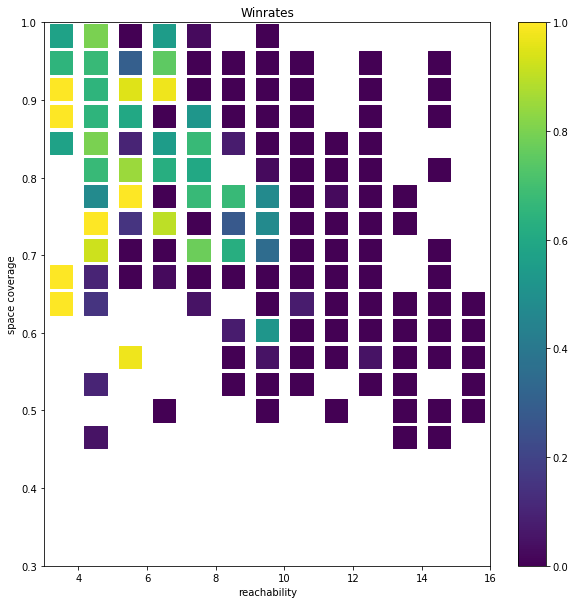

In [8]:
fig_size = 10
_, ax = plt.subplots(1, 1, figsize=(fig_size,fig_size))
plot_winrate(ax, generation, one_partition, marker_size=fig_size * 100 // 2)

In [12]:
font = {'family' : 'arial',
        'size'   : 18}

matplotlib.rc('font', **font)

It's silly, I'd have to readjust for every different plot manually.

In [14]:
def plot_winrate_from_path(path):
    with open(path) as fp:
        generation = json.load(fp)
    fig_size = 10
    _, ax = plt.subplots(1, 1, figsize=(fig_size,fig_size))
    plot_winrate(ax, generation, one_partition, marker_size=fig_size * 100 // 2)

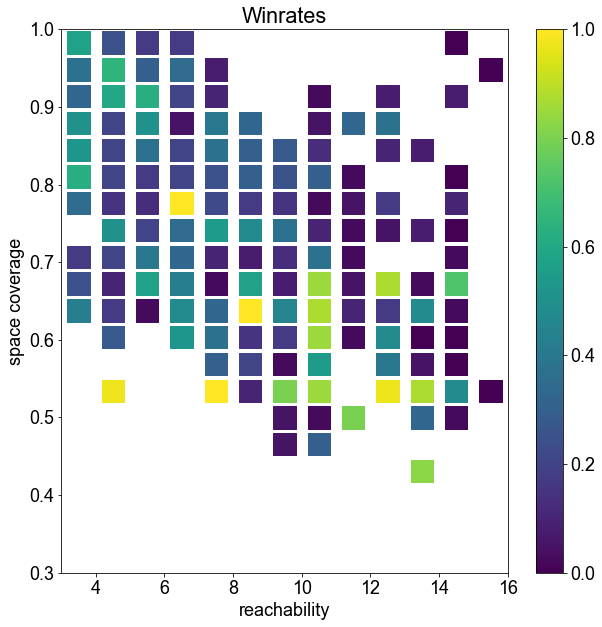

In [15]:
plot_winrate_from_path("../zelda_experiments/generations/generation_sampleRandom_10_gens_50_iter_100_init_40_roll_17_seed_00009.json")